# **Prova P1 - TTI109 - Estatística (CIC-SIN)**
# **20 de setembro de 2023**

## Instruções:

*   Salve esse *notebook* com o nome "RA.ipynb"
*   Preencha corretamente os campos de identificação (nome completo e RA) e execute a célula de código que contém tais campos.
*   É permitida a consulta ao material da disciplina (OPEN-LMS).
*   É permitida a consulta ao GitHub pessoal.
*   A prova consta de 3 questões:
    * Questão 01 - Valor 4,5 pontos (itens *a* até *f*).
    * Questão 02 - Valor 3,5 pontos (itens *a* até *f*).
    * Questão 03 - Valor 2,0 pontos (itens *a* até *c*).
*   Nas questões, grande parte do código já é fornecida. Preencha as lacunas `'Seu código aqui'` com sua solução.
*   Quando pertinente, responda às questões dissertativas nos campos a elas destinados e execute a célula de código que contém esses campos.










In [ ]:
#@title Identificação
Nome = "Felipe Costa Muniz" #@param {type:"string"}
RA = "23.01459-8" #@param {type:"string"}

In [ ]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## **Questão 01 - Estatística Descritiva**

Considere o conjunto de dados obtido por meio da aplicação de um questionário respondido por 50 alunos matriculados em uma disciplina ministrada na Fundação Getúlio Vargas em São Paulo. As informações estão
disponíveis no arquivo `ceagfgv.csv` que será acessado automaticamente pelo código abaixo.

In [31]:
# Download do conjunto de dados - arquivo ceagfgv.csv
%%capture
!gdown --id 1708AZqneuZBSZUde04n_NsAEqtyBNDr9

Os dados serão armazenados em um `DataFrame` denominado `pesquisa`. As colunas disponíveis para análise também são exibidas pelo código a seguir.

In [ ]:
# Dados armazenados no DataFrame pesquisa
pesquisa = pd.read_csv('ceagfgv.csv', sep=';', encoding='utf-8')

# Colunas disponíveis para análise
pesquisa.columns

Index(['ident', 'salario', 'ingles', 'anosformado', 'estcivil', 'filhos',
       'bebida'],
      dtype='object')

Em uma análise exploratória, é interessante conhecer os tipos de informação registrados em cada coluna do `DataFrame`. A célula seguinte exibe os tipos de dados armazenados em cada coluna de `pesquisa`.

In [ ]:
# Tipos das colunas
print(pesquisa.dtypes)

ident            int64
salario        float64
ingles          object
anosformado     object
estcivil        object
filhos           int64
bebida          object
dtype: object


Note que a coluna `'anosformado'` é do tipo `object`. No entanto, ao que parece, essa coluna deve registrar há quantos anos o aluno respondente obteve seu diploma de graduação. Sendo assim, é preciso alterar o tipo de dados para números inteiros ou reais. O código a seguir altera o tipo de dados de `'anosformado'` de `object` para `float`.

In [ ]:
# A coluna 'anosformado' é do tipo object. Devemos torná-la do tipo float.
pesquisa['anosformado'] = pesquisa['anosformado'].apply(lambda x: str(x).replace(',', '.'))
pesquisa = pesquisa.astype({'anosformado': 'float'})

Outro passo importante é verificar a existência de possíveis valores faltantes no conjunto de dados. Verifique acionando a célula a seguir.

In [ ]:
# Há valores faltantes!
pesquisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ident        50 non-null     int64  
 1   salario      49 non-null     float64
 2   ingles       48 non-null     object 
 3   anosformado  48 non-null     float64
 4   estcivil     50 non-null     object 
 5   filhos       50 non-null     int64  
 6   bebida       50 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.9+ KB


Existem valores faltantes nas colunas `'salario'`, `'ingles'`e `'anosformado'`. Para se determinar uma estratégia de substituição de tais valores faltantes, é importante inspecionar algumas linhas do `DataFrame`. Execute a célula a seguir.

In [ ]:
# Inspecione algumas linhas do DataFrame pesquisa
pesquisa.sample(n=10, random_state=33)

,ident,salario,ingles,anosformado,estcivil,filhos,bebida
5,6,2000.0,fluente,1.0,solteiro,0,nao alcoolica
27,28,1900.0,fluente,2.0,solteiro,0,outra alcoolica
37,38,7000.0,fluente,10.0,solteiro,1,nao alcoolica
15,16,1600.0,fluente,1.0,solteiro,2,cerveja
40,41,1500.0,algum,0.0,solteiro,0,nao alcoolica
45,46,3000.0,algum,7.0,solteiro,0,cerveja
4,5,2500.0,nenhum,11.0,casado,2,nao alcoolica
25,26,1000.0,algum,NaN,solteiro,1,outra alcoolica
0,1,3500.0,fluente,12.0,casado,1,outra alcoolica
28,29,2600.0,algum,1.0,solteiro,0,nao alcoolica


**(a)** (0,5) Qual medida de posição você usaria para substituir os valores faltantes nas colunas `'salario'` e `'anosformado'`? Justifique sua resposta.

In [9]:
Q1a = "Mediana" # @param ["Selecione", "Media", "Mediana", "Moda"]


In [10]:
# @title Justificativa
Q1a_texto = "A mediana nao e afetada por outliers" # @param {type:"string"}


**(b)** (0,5) Idem para a coluna `'ingles'`. Justifique sua resposta.

In [12]:
Q1b = "Moda" # @param ["Selecione", "Media", "Mediana", "Moda"]


In [13]:
# @title Justificativa
Q1b_texto = "Trata-se de uma coluna categorica" # @param {type:"string"}


A célula a seguir substitui os valores faltantes. Note que o comando `pesquisa.info()` indica 50 valores não-nulos (ou seja, disponíveis) em cada coluna.

In [11]:
# Substituindo os valores faltantes
values = {'salario': pesquisa['salario'].median(),
          'ingles': pesquisa['ingles'].mode()[0],
          'anosformado': pesquisa['anosformado'].median()}
pesquisa.fillna(value=values, inplace=True)
pesquisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ident        50 non-null     int64  
 1   salario      50 non-null     float64
 2   ingles       50 non-null     object 
 3   anosformado  50 non-null     float64
 4   estcivil     50 non-null     object 
 5   filhos       50 non-null     int64  
 6   bebida       50 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.9+ KB


**(c)** (1,0) Construa um gráfico setorial para representar a distribuição dos dados registrados na coluna `'estcivil'`, *em valores percentuais*. Para isso, é necessário construir uma tabela de distribuição de frequências para a referida coluna. Use o método `value_counts()`. Qual o estado civil menos frequente?

In [30]:
# Tabela de distribuição de frequências
# Contém o número de ocorrências de cada categoria registrada na coluna estcivil
frequencias = pesquisa['estcivil'].value_counts()

tabela = pd.DataFrame(data=frequencias.values, columns=['Freq'], index=frequencias.index)
display(tabela)

,Freq
solteiro,36
casado,12
outros,2


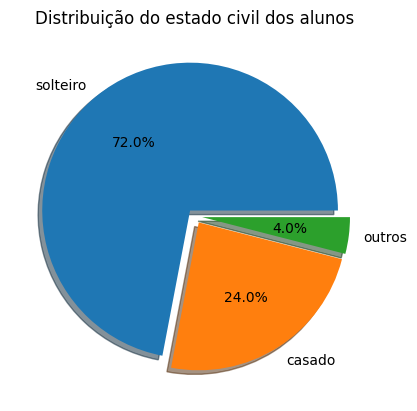

In [18]:
# Gráfico setorial
plt.pie(x=tabela['Freq'], labels= tabela.index, autopct='%1.1f%%', shadow=True, explode=[0.05]*len(tabela.index))
plt.title('Distribuição do estado civil dos alunos')
plt.show()

In [29]:
# @title Estado civil menos frequente
Q1c = "Outros" # @param ["Selecione", "Casado", "Solteiro", "Outros"]


**(d)** (1,0) Construa um gráfico de Pareto para representar a distribuição dos dados registrados na coluna `'bebida'`, *em valores absolutos*. Para isso, é necessário construir uma tabela de distribuição de frequências (ordenada de forma decrescente) para a referida coluna. Use o método `value_counts()`. Qual a bebida preferida pelos entrevistados?

In [19]:
# Tabela de distribuição de frequências
# Contém o número de ocorrências de cada categoria registrada na coluna bebida

frequencias = pesquisa['bebida'].value_counts()
tabela = pd.DataFrame(data=frequencias.values, columns=['Freq'],
                      index=frequencias.index)

# Organizando os dados em ordem decrescente
tabela = tabela.sort_values(by='Freq', ascending=False)
display(tabela)

,Freq
nao alcoolica,23
outra alcoolica,16
cerveja,11


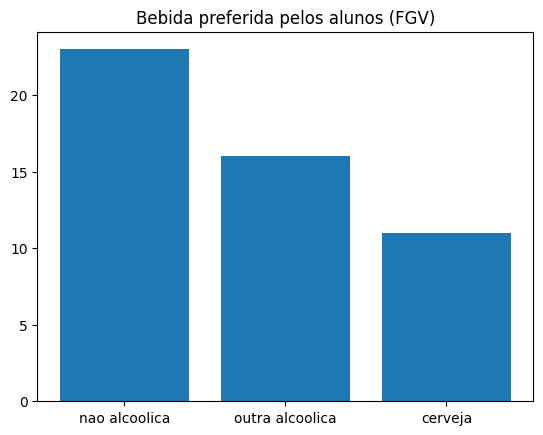

In [21]:
# Gráfico de Pareto
plt.bar(x=tabela.index, height=tabela['Freq'])
plt.title('Bebida preferida pelos alunos (FGV)')
plt.show()

In [28]:
# @title Bebida preferida
Q1d = "Nao alcoolica" # @param ["Selecione", "Nao alcoolica", "Outra alcoolica", "Cerveja"]


**(e)** (1,0) Construa uma tabela de distribuição de frequências para a coluna `'salario'`. Para tanto:

* Adote como salário mínimo 0 reais e como salário máximo 7500 reais;
* Use classes com amplitude de 1500 reais (para criá-las, use o método `interval_range` com intervalos fechados à esquerda (parâmetro `closed='left'`);
* Adote o ponto médio como representante de cada classe;
* Inclua colunas de frequência relativa e acumulada (também relativa, ou seja, percentual).

A seguir, responda:

* Qual a faixa salarial da classe mais populosa?
* Que porcentagem dos alunos entrevistados tem salários de até 4500 reais?

In [22]:
# Salários mínimo / máximo e amplitude de classe
sal_min = 0
sal_max = 7500
amplitude = 1500

# Cálculo das classes da distribuição de salários
# Não se esqueça de incluir o parâmetro closed='left'
classes = pd.interval_range(start=sal_min, end=sal_max, freq=amplitude, closed='left')

# Inicialização da tabela de distribuição de frequências
dist = pd.DataFrame(pesquisa['salario'].value_counts(bins=classes).sort_index())
dist = dist.reset_index()
dist.columns = ['Classe', 'Freq']
display(dist)

,Classe,Freq
0,"[0, 1500)",4
1,"[1500, 3000)",29
2,"[3000, 4500)",12
3,"[4500, 6000)",1
4,"[6000, 7500)",4


In [23]:
# Cálculo dos pontos médios das classes
pts_medios = [classe.mid for classe in classes]

# Inserção da coluna de pontos médios
dist['PtMédio'] = pts_medios
display(dist)

,Classe,Freq,PtMédio
0,"[0, 1500)",4,750.0
1,"[1500, 3000)",29,2250.0
2,"[3000, 4500)",12,3750.0
3,"[4500, 6000)",1,5250.0
4,"[6000, 7500)",4,6750.0


In [24]:
# Cálculo e inserção das colunas de frequência relativa e acumulada
observacoes = len(pesquisa['salario'])
dist['FreqRel'] = dist['Freq']/observacoes
dist['FreqRelAcum'] = dist['FreqRel'].cumsum()
display(dist)

,Classe,Freq,PtMédio,FreqRel,FreqRelAcum
0,"[0, 1500)",4,750.0,0.08,0.08
1,"[1500, 3000)",29,2250.0,0.58,0.66
2,"[3000, 4500)",12,3750.0,0.24,0.90
3,"[4500, 6000)",1,5250.0,0.02,0.92
4,"[6000, 7500)",4,6750.0,0.08,1.00


In [26]:
# @title Faixa salarial da classe mais populosa
Q1e_classe = "(1500, 3000]" # @param ["Selecione", "(0, 1500]", "(1500, 3000]", "(3000, 4500]", "(4500, 6000]", "(6000, 7500]"]


In [27]:
# @title Porcentagem de alunos com salários de até 4500 reais
Q1e_porc = "90%" # @param {type:"string"}


**(f)** (0,5) Construa um histograma para a distribuição de salários dos alunos que participaram da pesquisa. Tome como base a tabela de distribuição de frequência do item anterior.

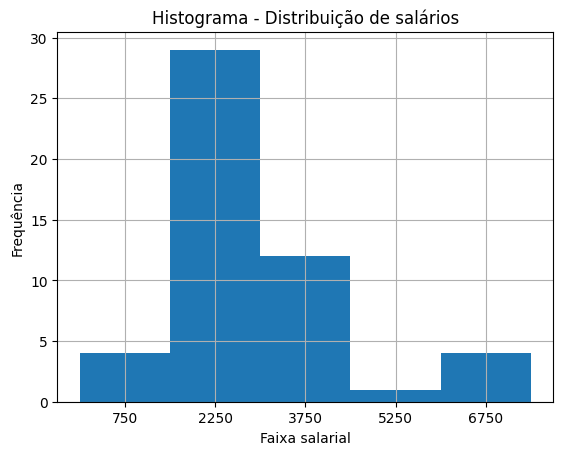

In [25]:
# Construção do histograma
# Os compartimentos (bins) estão calculados na variável caixas

caixas = np.arange(sal_min, sal_max+1, amplitude)
pesquisa['salario'].hist(bins=caixas)
plt.xticks(pts_medios)
plt.title('Histograma - Distribuição de salários')
plt.xlabel('Faixa salarial')
plt.ylabel('Frequência')
plt.show()

## **Questão 02 - Medidas de posição e dispersão**

O conjunto de dados Iris de Fisher foi introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de 1936 intitulado "*O uso de múltiplas medições em problemas taxonômicos, como um exemplo de análise discriminante linear*".

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris (*Iris setosa*, *Iris virginica* e *Iris versicolor*).

Quatro variáveis foram medidas em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros, conforme figura abaixo.

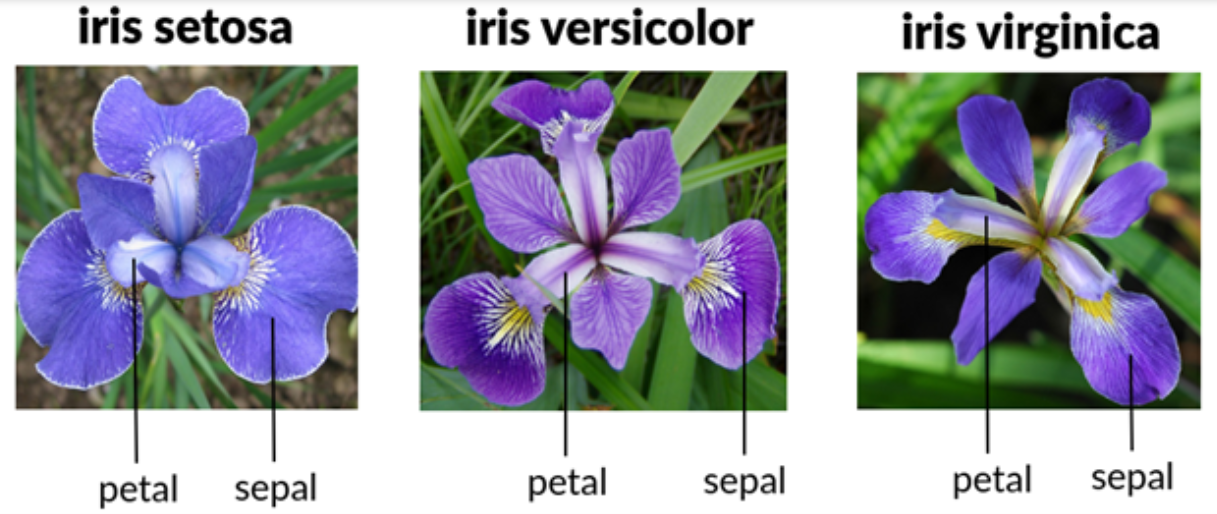

O código a seguir importa o conjunto de dados `Iris` e o armazena no `DataFrame` denominado `flores`. Execute a célula e inspecione algumas linhas de dados.

In [32]:
# Leitura dos dados "externos": módulo de datasets da biblioteca Scikit-learn
from sklearn.datasets import load_iris

# Obtém os dados em objeto da classe 'Bunch' e cria um DataFrame correspondente
Iris = load_iris()
flores = pd.DataFrame(data = Iris.data,columns = Iris.feature_names)
flores['target'] = Iris.target
flores['species'] = flores['target'].replace(dict(enumerate(Iris.target_names)))
display(flores.sample(10))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
60,5.0,2.0,3.5,1.0,1,versicolor
128,6.4,2.8,5.6,2.1,2,virginica
41,4.5,2.3,1.3,0.3,0,setosa
92,5.8,2.6,4.0,1.2,1,versicolor
61,5.9,3.0,4.2,1.5,1,versicolor
131,7.9,3.8,6.4,2.0,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
147,6.5,3.0,5.2,2.0,2,virginica
125,7.2,3.2,6.0,1.8,2,virginica
2,4.7,3.2,1.3,0.2,0,setosa


**(a)** (1,0) Calcule:

* a média da coluna `'sepal length (cm)'`;
* a mediana da coluna `'sepal width (cm)'`;
* a variância da coluna `'petal length (cm)'`;
* o desvio padrão da coluna `'petal width (cm)'`.

In [37]:
# Cálculo da média da coluna 'sepal length (cm)'
media_sl = flores['sepal length (cm)'].mean()
print(f'Média dos comprimentos das sépalas = {media_sl:.2f} cm')

# Cálculo da mediana da coluna 'sepal width (cm)'
mediana_sw = flores['sepal width (cm)'].median()
print(f'Mediana das larguras das sépalas = {mediana_sw:.2f} cm')

# Cálculo da variância da coluna 'petal length (cm)'
var_pl = flores['petal length (cm)'].var(ddof=1)
print(f'Variância dos comprimentos das pétalas = {var_pl:.2f} cm^2')

# Cálculo do desvio padrão da coluna 'petal width (cm)'
dp_pw = flores['petal width (cm)'].std(ddof=1)
print(f'Desvio padrão das larguras das pétalas = {dp_pw:.2f} cm')

Média dos comprimentos das sépalas = 5.84 cm
Mediana das larguras das sépalas = 3.00 cm
Variância dos comprimentos das pétalas = 3.12 cm^2
Desvio padrão das larguras das pétalas = 0.76 cm


Vamos agora concentrar o estudo na coluna `'sepal width (cm)'`. O objetivo é detectar a ocorrência de *outliers* na distribuição das larguras das sépalas.

**(b)** (0,5) Determine os quartis da distribuição de larguras das sépalas das Iris.

In [39]:
# Cálculo dos quartis
quartis = flores['sepal width (cm)'].quantile([0.25, 0.50, 0.75], interpolation='linear')
display(quartis)

0.25    2.8
0.50    3.0
0.75    3.3
Name: sepal width (cm), dtype: float64

**(c)** (0,75) Investigue a ocorrência de outliers, empregando o método da amplitude interquartil.

In [42]:
# Calculando a amplitude interquartil
interquartil = quartis[0.75] - quartis[0.25]
print(f'Amplitude interquartil: {interquartil:.2f} cm')

# Limites para detecção de outliers
lim_min = quartis[0.25] - 1.5*interquartil
lim_max = quartis[0.75] + 1.5*interquartil
print('Limites de detecção para outliers:')
print(f'Inferior = {lim_min:.2f} cm')
print(f'Superior = {lim_max:.2f} cm')

# Procurando por outliers
out_inf = flores['sepal width (cm)'].loc[flores['sepal width (cm)'] <= lim_min]
print('Outlier inferior:', out_inf.values)
out_sup = flores['sepal width (cm)'].loc[flores['sepal width (cm)'] >= lim_max]
print('Outlier superior:', out_sup.values)

Amplitude interquartil: 0.50 cm
Limites de detecção para outliers:
Inferior = 2.05 cm
Superior = 4.05 cm
Outlier inferior: [2.]
Outlier superior: [4.4 4.1 4.2]


**(d)** (0,25) Construa um boxplot representativo da distribuição de larguras das sépalas das Iris e comprove a ocorrência dos outliers.

*DICA:* Verifique se o boxplot gerado confirma a sua resposta fornecida no item (c).

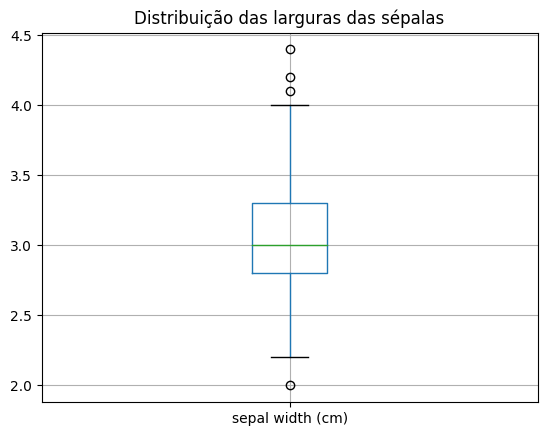

In [45]:
# Construção do boxplot
flores.boxplot(column='sepal width (cm)')
plt.title('Distribuição das larguras das sépalas')
plt.show()

**(e)** (0,5) Em uma mesma figura, construa boxplots que representem as distribuições de comprimento e largura das pétalas e sépalas das flores Iris. Use o `DataFrame` denominado `flores_box` que reúne todas as colunas de interesse: `'petal width (cm)'`, `'petal length (cm)'`, `'sepal width (cm)'` e `'sepal length (cm)'`.

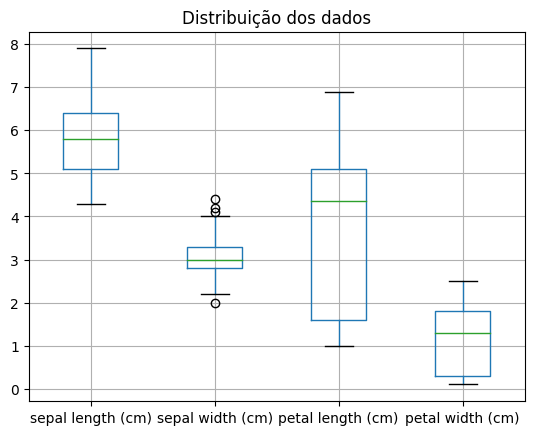

In [46]:
flores_box = flores.drop(['target'], axis=1)
flores_box.boxplot()
plt.title('Distribuição dos dados')
plt.show()

**(f)** (0,5) A partir do resultado do item anterior, classifique a distribuição dos comprimentos das pétalas (`'petal length (cm)'`) quanto a sua simetria. Justifique sua resposta.

In [ ]:
Q2f1 = "Assimetrica a esquerda" #@param ["Selecione", "Simetrica", "Assimetrica a direita", "Assimetrica a esquerda"]
Q2b2 = "Cauda longa a esquerda" #@param {type:"string"}



## **Questão 03 - Probabilidades: Condicionais, Lei da Adição e da Multiplicação**

Você dispõe de um conjunto de dados relativos a pacientes que desejam perder peso. As colunas de interesse para nossa análise são:

* `'genhlth'`: estado geral de saúde do paciente [ variável categórica: `'excellent'` (excelente), `'very good'`(muito bom), `'good'`(bom), `'fair'`(razoável) e `'poor'`(ruim) ].

* `'exerany'`: variável categórica que indica se o paciente faz algum tipo de exercício físico (`1`) ou não (`0`).

* `'smoke 100'`: variável categórica que indica se o paciente é fumante (`1`) ou não (`0`).

Execute a célula de código a seguir e verifique 10 linhas aleatórias do conjunto de dados.

In [47]:
df = pd.read_csv('https://www.marksmath.org/data/cdc.csv')
df.sample(10)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
5355,good,1,1,0,71,185,180,33,m
9881,very good,1,1,1,63,115,115,51,f
16742,excellent,1,1,0,72,195,185,52,m
17517,excellent,1,1,0,70,163,150,39,f
14953,good,1,1,1,68,180,160,53,f
4438,good,1,1,0,70,196,160,72,f
1854,excellent,1,1,0,67,145,135,60,f
2076,good,1,1,1,72,200,200,46,m
13429,very good,1,1,0,64,135,120,57,f
17740,good,1,1,0,70,174,174,63,m


**(a)** (0,5) Construa uma tabela conjunta de distribuição de frequências que relacione o tabagismo (nas colunas) com a prática de exercícios físicos (nas linhas). Certifique-se de que sua tabela indique os totais das linhas e colunas.

In [49]:
tabela = pd.crosstab(index=df.exerany, columns=df.smoke100, margins=True)
tabela

smoke100,0,1,All
exerany,,,
0,2543,2543,5086
1,8016,6898,14914
All,10559,9441,20000


**(b)** (0,5) Com base na tabela anterior, calcule a probabilidade de que um paciente aleatoriamente selecionado:

* seja fumante, dado que pratica exercícios físicos.
* não pratica exercícios físicos, dado que é fumante.

In [52]:
# P(fumante | pratica exercícios)
prob1 = tabela.iloc[1,1] / tabela.iloc[1,2]
print(f'P(fumante | pratica exercícios) = {prob1*100:.2f}%')

P(fumante | pratica exercícios) = 46.25%


In [54]:
# P(não pratica exercícios | fumante)
prob2 = tabela.iloc[0,1] / tabela.iloc[2,1]
print(f'P(não pratica exercícios | fumante) = {prob2*100:.2f}%')

P(não pratica exercícios | fumante) = 26.94%


A tabela conjunta de distribuição de frequências gerada pelo código a seguir relaciona o tabagismo (nas colunas) com o estado geral de saúde dos pacientes (nas linhas).

In [55]:
tabela = pd.crosstab(df.genhlth, df.smoke100, margins=True)
tabela

smoke100,0,1,All
genhlth,,,
excellent,2879,1778,4657
fair,911,1108,2019
good,2782,2893,5675
poor,229,448,677
very good,3758,3214,6972
All,10559,9441,20000


**(c)** (1,0) Com base na tabela anterior, calcule a probabilidade de que um paciente aleatoriamente selecionado:

* tenha um quadro de saúde geral muito bom.
* seja fumante e tenha um quadro de saúde geral excelente.
* não fume ou tenha um quadro de saúde geral ruim.

In [56]:
# P(quadro de saúde muito bom)
prob3 = tabela.iloc[4,2] / tabela.iloc[5,2]
print(f'P(quadro de saúde muito bom) = {prob3*100:.2f}%')

P(quadro de saúde muito bom) = 34.86%


In [57]:
# P(fumante e quadro de saúde excelente)
# Use como resultado final a variável prob

P1 = tabela.iloc[5,1] / tabela.iloc[5,2]
P2 = tabela.iloc[0,1] / tabela.iloc[5,1]
prob = P1 * P2

# P(fumante e quadro de saúde excelente)
print(f'P(fumante e quadro de saúde excelente) = {prob*100:.2f}%')

P(fumante e quadro de saúde excelente) = 8.89%


In [58]:
# P(não fume ou quadro de saúde ruim)
# = P(não fume) + P(quadro de saúde ruim) - P(não fume e quadro de saúde ruim)
# Use como resultado final a variável prob

P1 = tabela.iloc[5,0] / tabela.iloc[5,2]
P2 = tabela.iloc[3,2] / tabela.iloc[5,2]
# = P(não fume) * P(Quadro de saúde ruim | não fume)
P3 = P1 * (tabela.iloc[3,0] / tabela.iloc[5,0])
prob = P1 + P2 - P3

# P(não fume ou quadro de saúde ruim)
print(f'P(não fume ou quadro de saúde ruim) = {(prob)*100:.2f}%')

P(não fume ou quadro de saúde ruim) = 55.04%
